## 日本語版
※ ここではGoogle Colaraboratoryでの実行を想定しています。

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets

data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


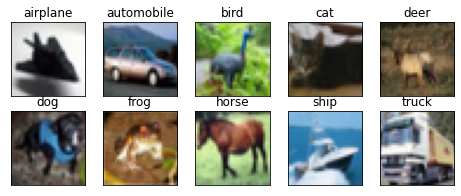

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [4]:
# スーパークラス（継承元のクラス）の確認
# https://note.nkmk.me/python-issubclass-mro-bases-subclasses/
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1C9A5C90970>, 1, 'automobile')

In [7]:
type(img), img


(PIL.Image.Image, <PIL.Image.Image image mode=RGB size=32x32 at 0x1C9A5C90970>)

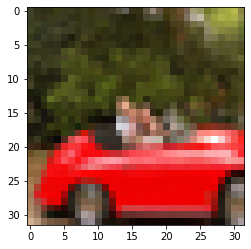

In [8]:
plt.imshow(img)
plt.show()

In [9]:
from torchvision import transforms
dir(transforms) # dir は指定したオブジェクトの属性やメソッドの一覧を戻す
# https://python.keicode.com/refs/dir-function.php

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [10]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [12]:
tensor_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data-unversioned/p1ch7/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [14]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [16]:
img_t

tensor([[[0.2431, 0.1961,  ..., 0.7176, 0.5373],
         [0.2471, 0.2157,  ..., 0.6706, 0.5686],
         ...,
         [0.7176, 0.5882,  ..., 0.5294, 0.5608],
         [0.8196, 0.7137,  ..., 0.5098, 0.6627]],

        [[0.2510, 0.1961,  ..., 0.7216, 0.5333],
         [0.2549, 0.2078,  ..., 0.6824, 0.5725],
         ...,
         [0.5725, 0.4627,  ..., 0.4627, 0.4902],
         [0.6824, 0.5922,  ..., 0.4667, 0.6118]],

        [[0.1725, 0.1020,  ..., 0.2980, 0.2824],
         [0.1451, 0.1020,  ..., 0.2941, 0.3020],
         ...,
         [0.4588, 0.3725,  ..., 0.3843, 0.4314],
         [0.5647, 0.4824,  ..., 0.4353, 0.6275]]])

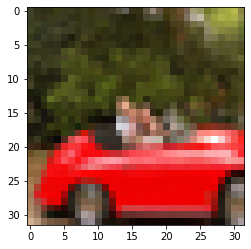

In [17]:
plt.imshow(img_t.permute(1, 2, 0))  # permute で次元の順序を指定
plt.show()

In [20]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape
# torch.stackの概念
# https://panda-clip.com/torch-stack/


torch.Size([3, 32, 32, 50000])

In [21]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4914, 0.4822, 0.4465])

In [22]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [23]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [24]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [25]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


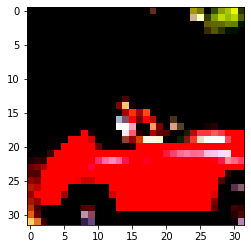

In [27]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()